<a href="https://colab.research.google.com/github/xg6144/Machine_Practice/blob/main/SGDClassfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#확률적 경사 하강법
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

fish = pd.read_csv('https://bit.ly/fish_csv')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input, test_input, train_target, test_target  = train_test_split(
    fish_input, fish_target, random_state=42
)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

sgd = SGDClassifier(loss='log', max_iter = 10, random_state=42)

sgd.fit(train_scaled, train_target)
#print(sgd.score(train_scaled, train_target))
#print(sgd.score(test_scaled, test_target))

sgd.partial_fit(train_scaled, train_target) #추가로 훈련
print(sgd.score(train_scaled, train_target))
print(sgd.score(test_scaled, test_target))

0.8151260504201681
0.825


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [31]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target) #unique()를 이용해 타깃의 목록을 만든다.

for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

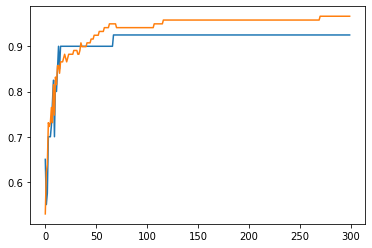

In [32]:
import matplotlib.pyplot as plt

plt.plot(test_score)
plt.plot(train_score)
plt.show()

In [33]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_sclaed, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [34]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_sclaed, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
